## Week2_class.Rmd
Requires: quantmod, fma, forecast packages

Generating the plots and ACFs from class:
Hints:  you can change the presentation of charts to have more than one pane per page by setting a graphical parameter (par).  To get a pane of 4 charts like we did for the "Match game" graphs, us par(mfrow=c(2,2))


Loading required package: tseries
Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



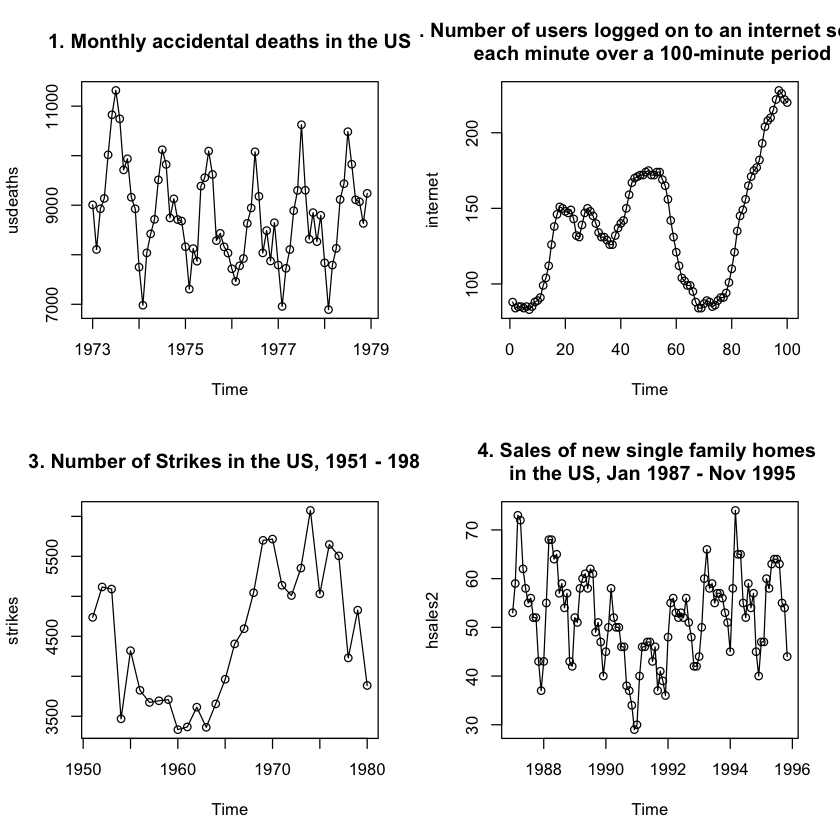

In [1]:
#save default settings
default_par <- par()

library(fma)
par(mfrow=c(2,2))

plot(usdeaths, type = "o", main = "1. Monthly accidental deaths in the US")
plot(internet, type = "o", main = "2. Number of users logged on to an internet server \n each minute over a 100-minute period")
plot(strikes, type = "o", main = "3. Number of Strikes in the US, 1951 - 1980")
plot(hsales2, type = "o", main = "4. Sales of new single family homes \n in the US, Jan 1987 - Nov 1995")



The parameter settings stick around until you change them.  To go back to basics you can reset to the default parameters you captured earlier. There will be warning messages because some parameters can't be set within Rstudio. I have suppressed them using the options command :


In [2]:
#to reset parameters to default
options(warn = -1) #turn off warnings
par(default_par) # Restore par() state
options(warn = 0) #turn them back on




If you want to really clear things out, including dumping the contents of your graphics window, you can change the device which automatically reinitializes the settings.



In [3]:
dev.off()


null device 
          1


To both calculate the autocorrelation function and generate the acf plot, there are two commands (of course there are!)

The most commonly used one is acf - part of the stats package. The default is that the plot is shown.



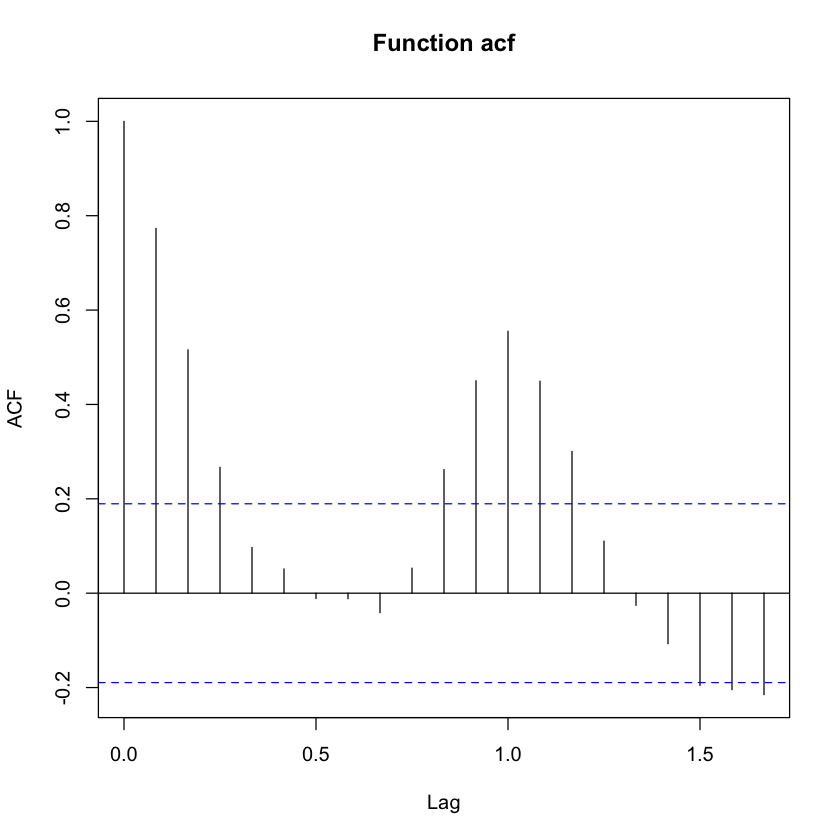

In [4]:
?acf
littleacf <- acf(hsales2, main = "Function acf")


There is also an Acf function in the forecast package.  Can you tell the difference?



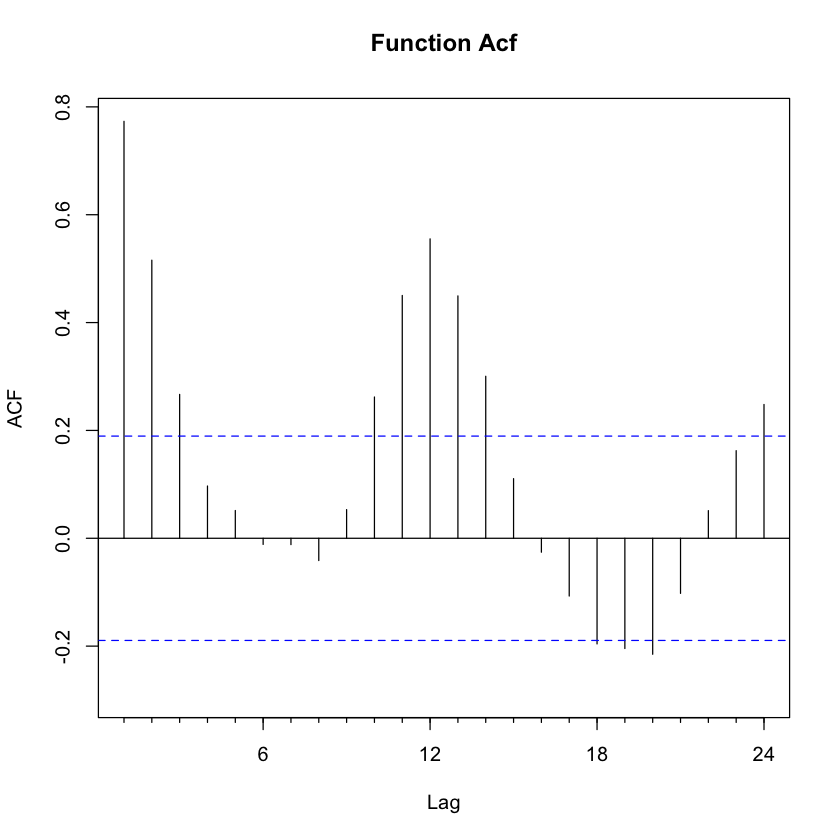

In [5]:
library(forecast)
# ?Acf
capacf <- Acf(hsales2, main = "Function Acf")


You can set the number of lags you want to investigate using the lag.max option.  This affects the chart and the calculations.


, , 1

             [,1]
 [1,]  1.00000000
 [2,]  0.81998255
 [3,]  0.53351970
 [4,]  0.27792462
 [5,]  0.10227985
 [6,]  0.01287592
 [7,] -0.03044206
 [8,] -0.01587839
 [9,]  0.02847161
[10,]  0.14676728
[11,]  0.31323541
[12,]  0.49712588
[13,]  0.59974777

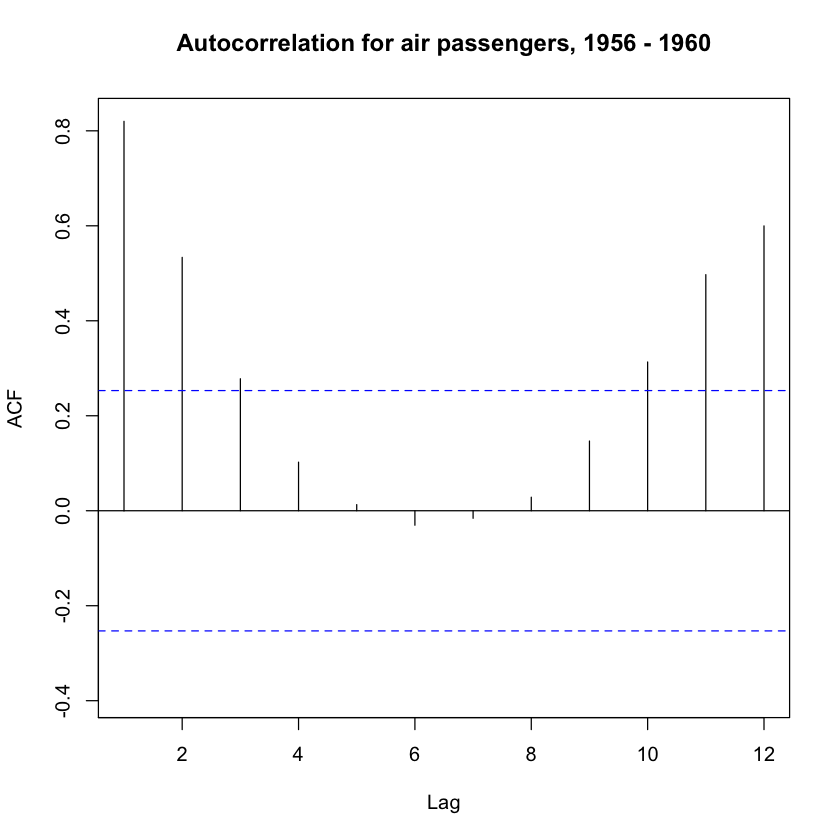

In [6]:
AP.short <- window(AirPassengers, start = 1956)

ap.Acf <- Acf(AP.short, lag.max = 12, main = "Autocorrelation for air passengers, 1956 - 1960")

ap.Acf$acf


Now it is time to play with "real" data. We will use the data from FRED which you can access using the quantmod package.



In [7]:
library(quantmod)
getSymbols("DJIA", src="FRED")  #-- takes ticker names and pulls data from FRED
class(DJIA)
head(DJIA)



Loading required package: xts
Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
    As of 0.4-0, ‘getSymbols’ uses env=parent.frame() and
 auto.assign=TRUE by default.

 This  behavior  will be  phased out in 0.5-0  when the call  will
 default to use auto.assign=FALSE. getOption("getSymbols.env") and 
 getOptions("getSymbols.auto.assign") are now checked for alternate defaults

 This message is shown once per session and may be disabled by setting 
 options("getSymbols.warning4.0"=FALSE). See ?getSymbols for more details.


[1] "DJIA"

[1] "xts" "zoo"

               DJIA
2006-09-05 11469.28
2006-09-06 11406.20
2006-09-07 11331.44
2006-09-08 11392.11
2006-09-11 11396.84
2006-09-12 11498.09

Now we want to reformat this daily data - we still want a time series but we want to get rid of weekends and holidays



[1] "ts"

[1] 11469.28 11406.20 11331.44 11392.11 11396.84 11498.09

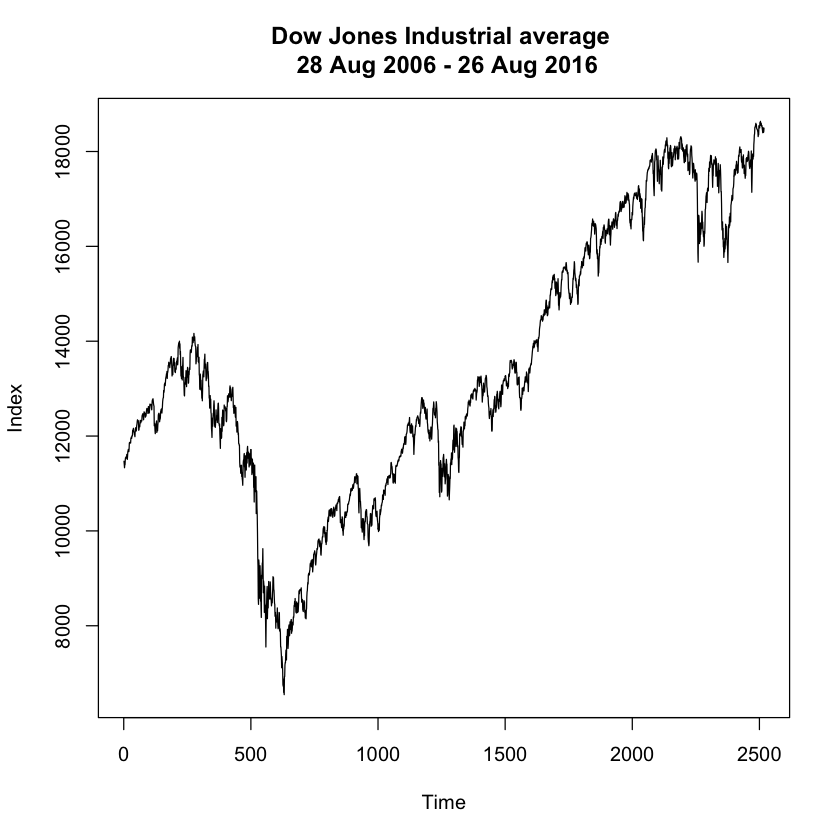

In [8]:
temp <- ts(na.omit(DJIA))
mydj <- ts(temp[1:length(temp)], start = 1)
class(mydj)
head(mydj)
plot(mydj, main = "Dow Jones Industrial average \n 28 Aug 2006 - 26 Aug 2016", ylab = "Index")



There is too much going on here - we will limit the series to the last year which is about 250 trading days



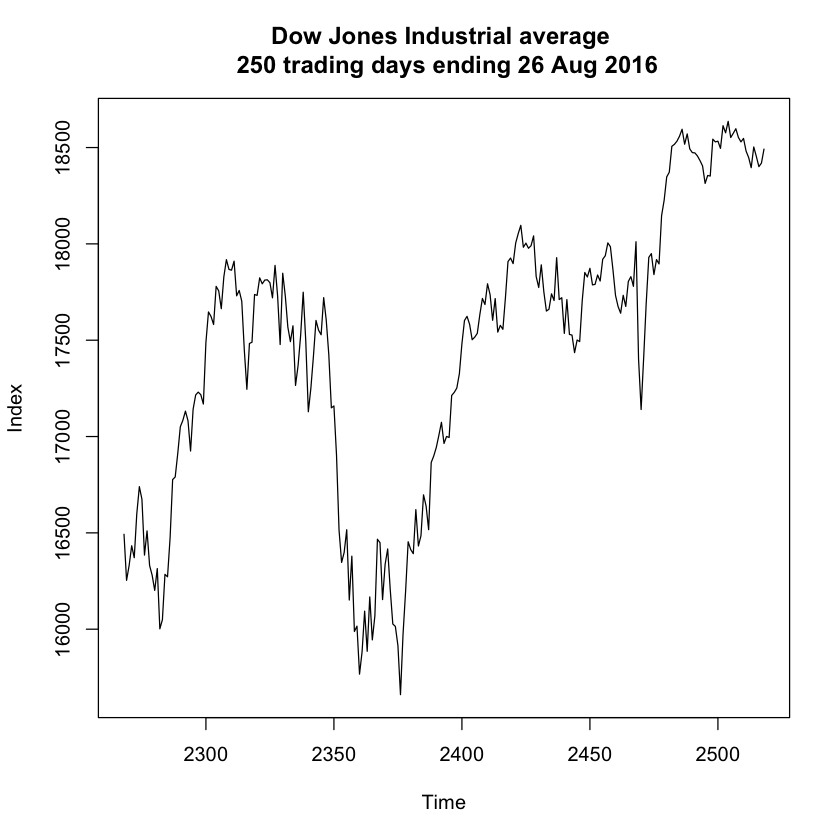

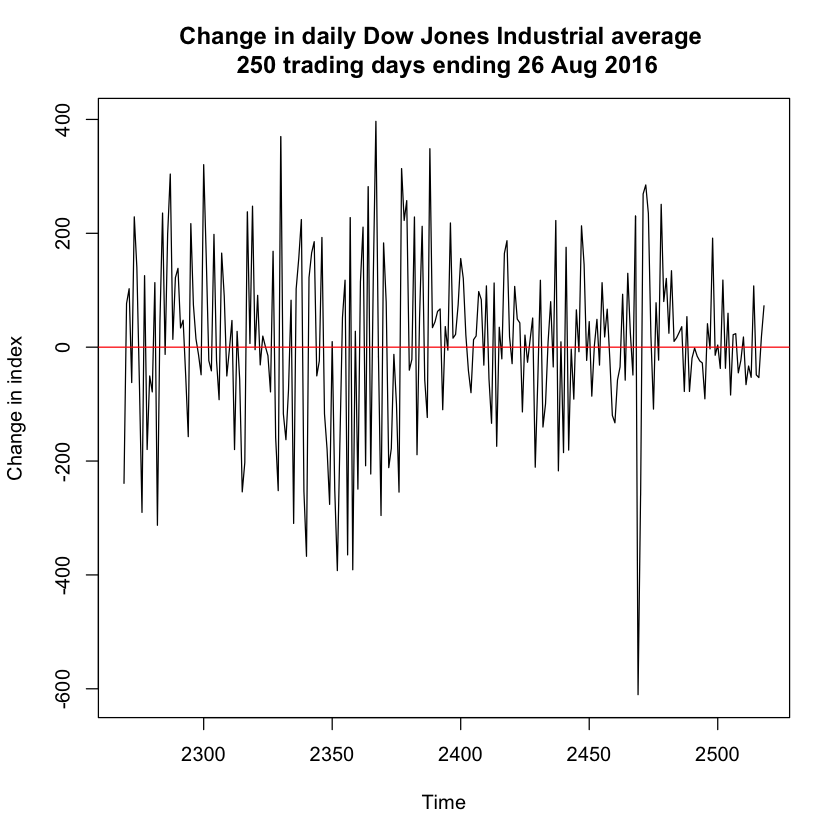

In [9]:

mydj.short <- window(mydj, start = length(mydj)-250, end = length(mydj)) #note the indexes - you can change this if you want

plot(mydj.short, main = "Dow Jones Industrial average \n 250 trading days ending 26 Aug 2016",  ylab = "Index")

#create the change in the DJ
diff_mydj <- diff(mydj.short)
plot(diff_mydj, main = "Change in daily Dow Jones Industrial average \n 250 trading days ending 26 Aug 2016", ylab = "Change in index")
abline(a=0,b=0, col = "red")





Okay, data munging and initial charting done.  Is this series white noise?  We'll look at a picture and calculate a Ljung Box statistic which requires that we choose lag length (h) to test.

How do you choose h? FPP suggests h=10 for non-seasonal data, and h=2*m for seasonal data.  Hyndman describes his reasoning here:
http://robjhyndman.com/hyndsight/ljung-box-test/

There are other arguments for other choices.  For example, see
http://stats.stackexchange.com/questions/6455/how-many-lags-to-use-in-the-ljung-box-test-of-a-time-series




	Box-Ljung test

data:  diff_mydj
X-squared = 6.1252, df = 10, p-value = 0.8046


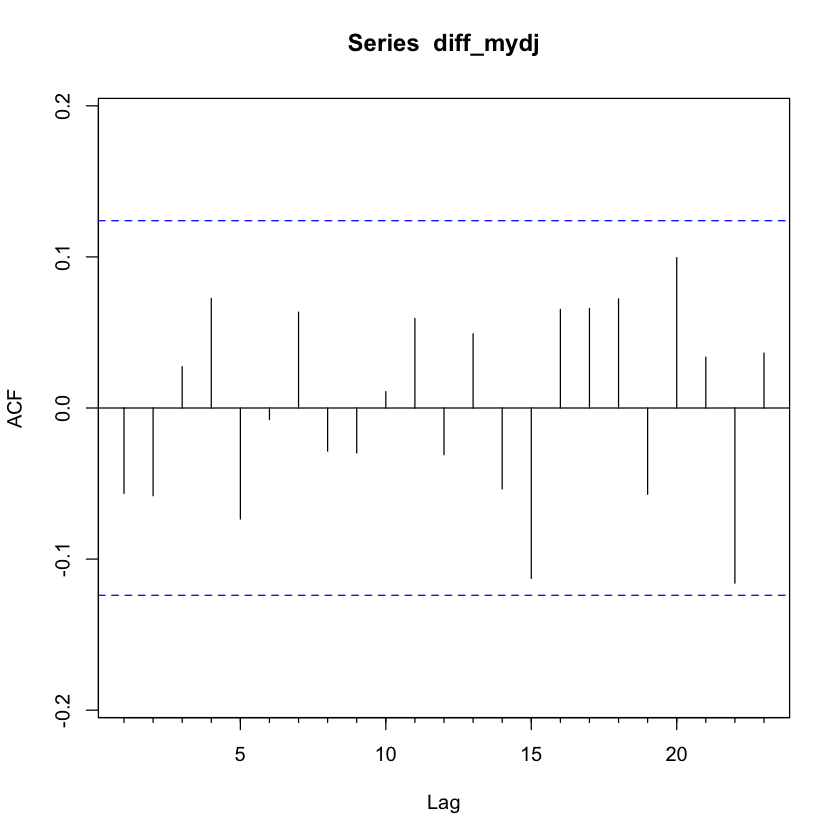

In [10]:
Acf(diff_mydj)

#now calculate the test statistic
Box.test(diff_mydj, lag=10, fitdf=0, type="Lj")



So, is this white noise?  Remember we are dealing with a null hypothesis of no serial correlation.  If we get a pvalue greater than our threshhold (say 5% for 95% confidence), then we fail to reject the null.  You'll need to re-learn how to get your head around that.

Side note:  there is another test statistic that you will often see used - the Box Pierce statistic.  The calculation is very similar to the Ljung Box but it doesn't do as well with larger values of h.  The Box.test command in R defaults to the Box Pierce statistic if you don't specify type.



In [11]:
#now calculate the test statistic
Box.test(diff_mydj, lag=10, fitdf=0)


	Box-Pierce test

data:  diff_mydj
X-squared = 5.9698, df = 10, p-value = 0.8178



You can see for this example, the statistic (which has the same Chi-square distribution to test the same hypothesis) is very close and the conclusion is the same.

Moving on to another example: working with IBM data
This code should look vaguely like your homework.  I chose to leave seasonal naive out for this example.



[1] 369

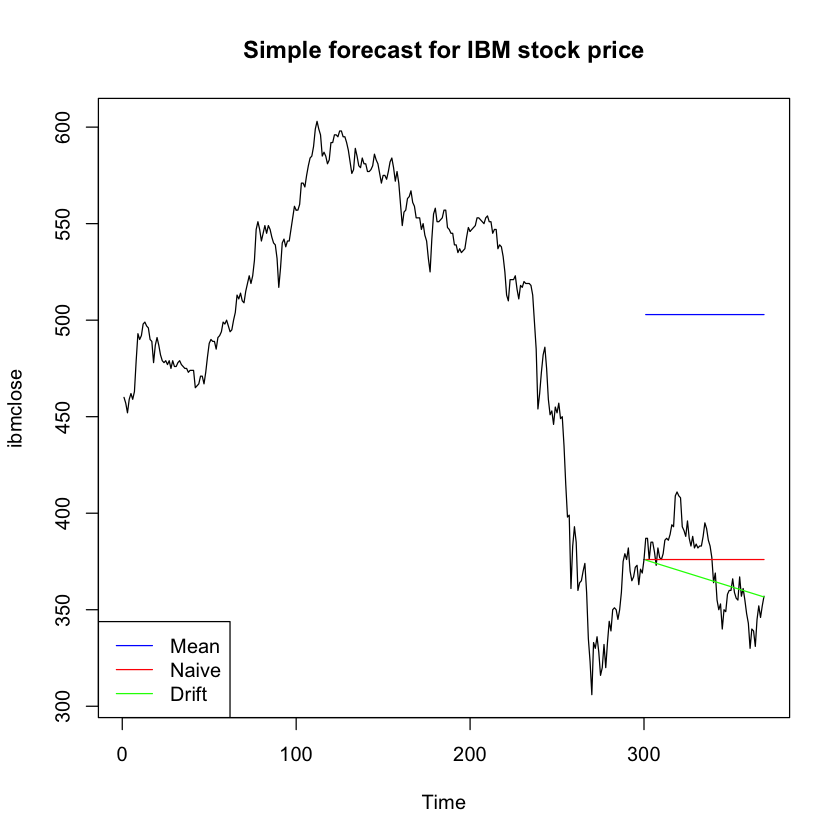

In [25]:
length(ibmclose)
#create the test/train split
train.ibm <- window(ibmclose, start = 1, end = 300)
test.ibm <- window(ibmclose, start = 301)

# run our simple models
Mean.ibm.split <- meanf(train.ibm, h=length(test.ibm))
Naive.ibm.split <- naive(train.ibm, h=length(test.ibm))
Drift.ibm.split <- rwf(train.ibm, drift = TRUE, h=length(test.ibm))


#draw some pictures

plot(ibmclose, plot.type = "single", main = "Simple forecast for IBM stock price")
lines(Mean.ibm.split$mean, col = "blue")
lines(Naive.ibm.split$mean, col = "red")
lines(Drift.ibm.split$mean, col = "green")
legend("bottomleft", legend=c("Mean","Naive","Drift"), col=c("blue", "red", "green"), lty = c(1,1,1))



What do the residuals look like?



In [27]:
res

Time Series:
Start = 301 
End = 369 
Frequency = 1 
 [1]  11  11   0   9   9   4  -3   6   1   0   3  10  11  10  13  18  17  33  35
[20]  33  32  17  15  12  20  11   7  12   6   8   6   7   7  12  19  16  10   7
[39]   1 -12  -7 -21 -26 -23 -36 -26 -27 -18 -16 -16 -10 -17 -20 -21  -9 -19 -15
[58] -21 -28 -33 -46 -36 -37 -45 -31 -24 -30 -24 -19


	Box-Ljung test

data:  res
X-squared = 341.94, df = 10, p-value < 2.2e-16


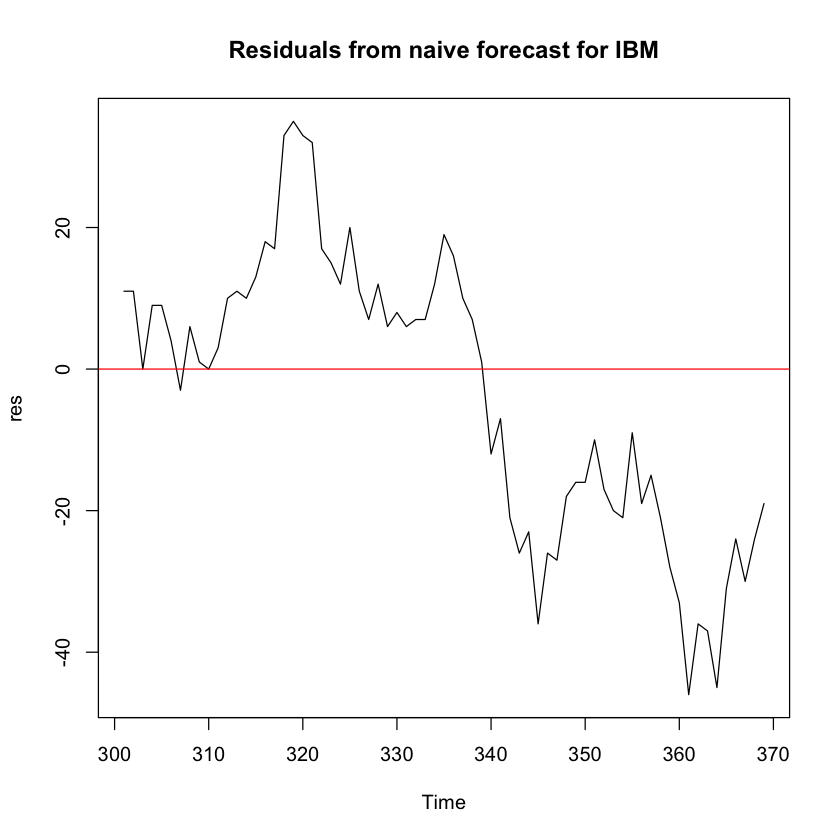

In [26]:
res <- test.ibm - Naive.ibm.split$mean
plot(res, main = "Residuals from naive forecast for IBM")
abline(a=0, b=0, col = "red")

Box.test(res, lag=10, fitdf=0, type="Lj")



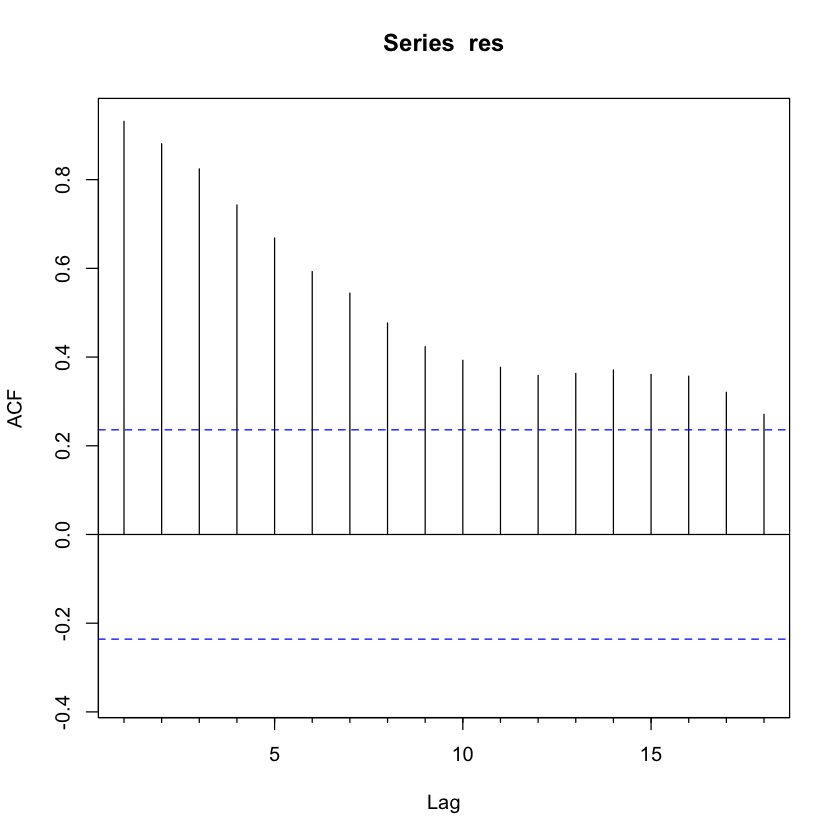

In [28]:
Acf(res)

Are these residuals white noise?  What does that mean?

Now: time series decomposition.  The R commands are very simple.  Here are the ones used to generate the charts in the slides:



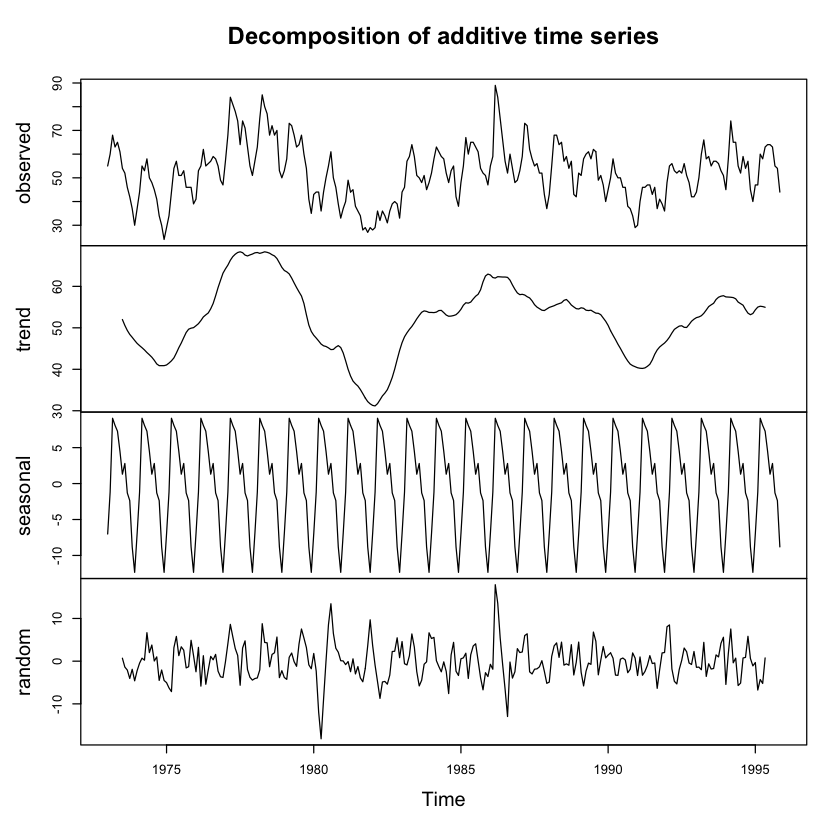

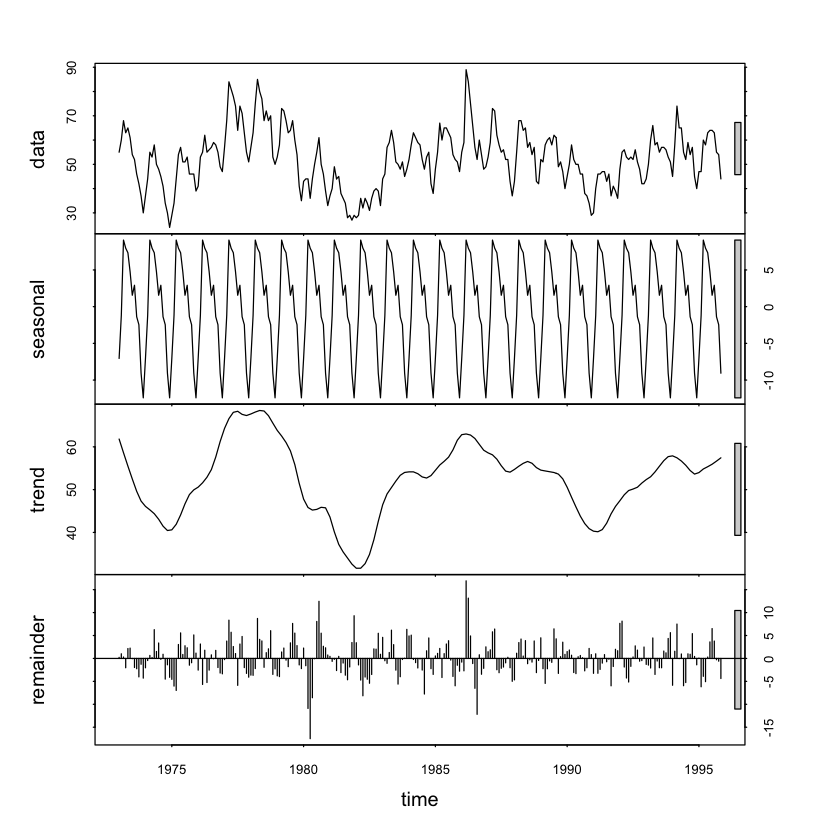

In [14]:
plot(decompose(hsales))
plot(stl(hsales,s.window="periodic"))


Similar but different calculations.
You can pull the pieces out of the decomposition process



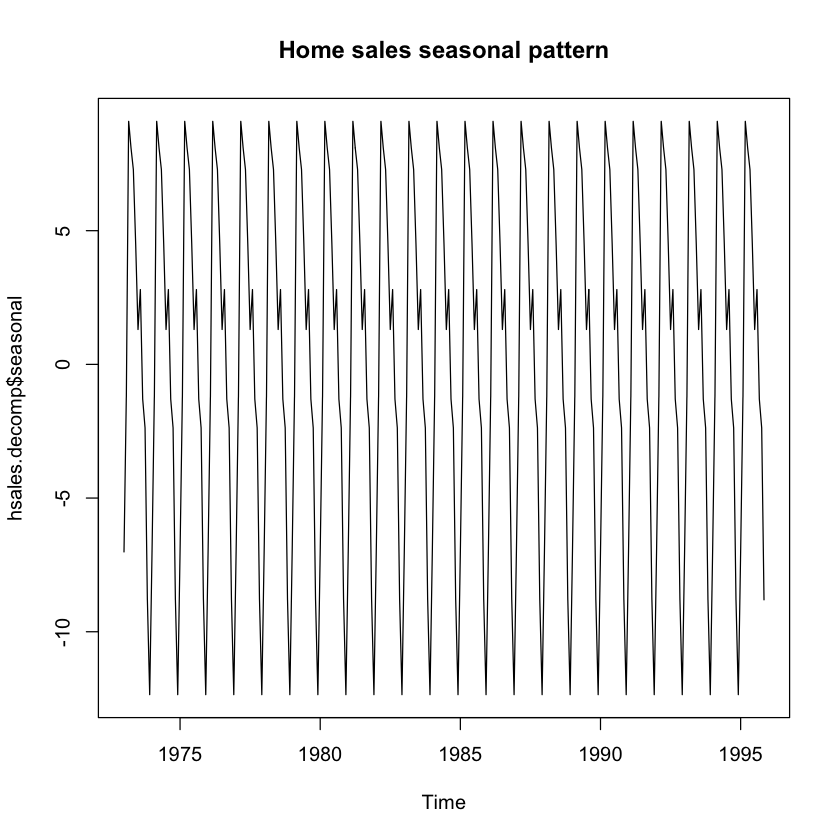

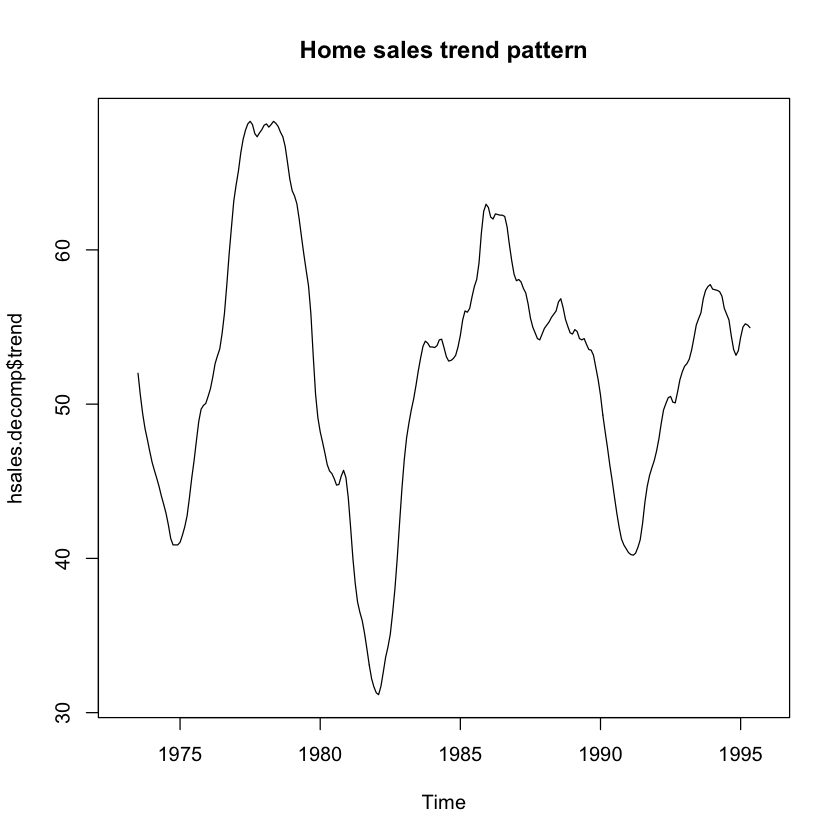

In [15]:
hsales.decomp <- decompose(hsales)
plot(hsales.decomp$seasonal, main = "Home sales seasonal pattern")
plot(hsales.decomp$trend, main = "Home sales trend pattern")


Now we will decompose the unemployment rate
Get data from FRED.  Note the convoluted way that the time series item is created.  The stl package requires a particular shape to the time series that doesn't always result from the ts command. Note the differences in the dimensions and the description in the "Environment" window.

I have searched high and low for a more straightforward way to deal with this issue and welcome better code than I have written (hint: bonus points possible!)



[1] "UNRATENSA" "UNRATE"

[1] "1948-01-01"

[1] "2016-08-01"

[1] "xts" "zoo"

[1] 824   1

NULL

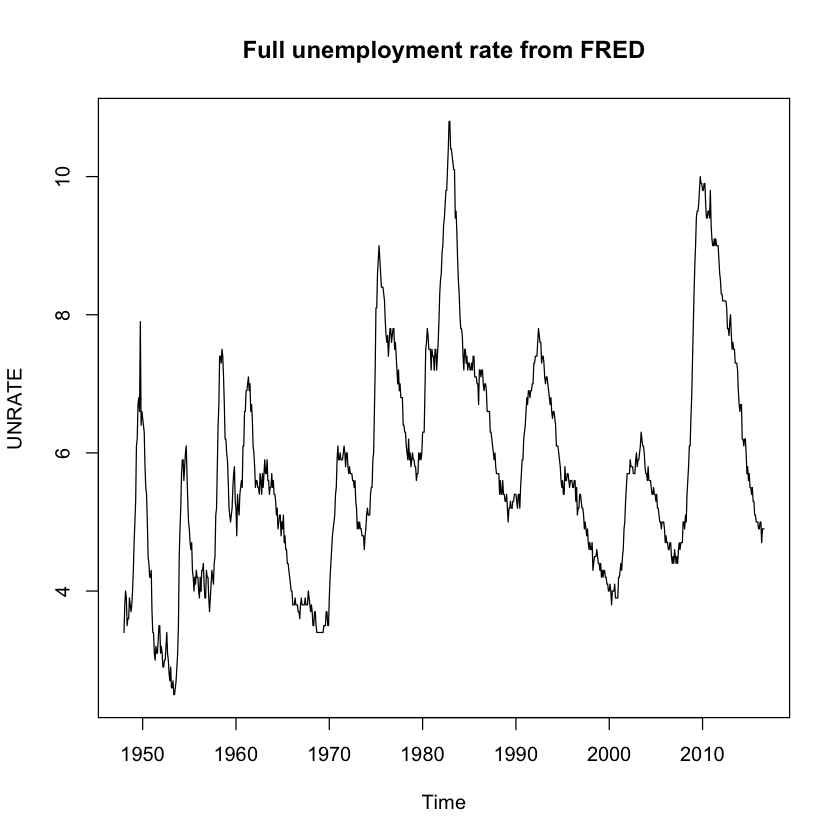

In [16]:
urates <- c("UNRATENSA", "UNRATE")
getSymbols(urates, src="FRED")  #-- takes ticker names and pulls data from FRED
start(UNRATENSA)
end(UNRATENSA)
class(UNRATENSA)
#suggestions for improving the 2 step process of creating a time series element with the correct dimensions are welcome

#first series
temp <- ts(UNRATENSA)
dim(temp)
ur.nsa <- ts(temp[1:823], start = c(1948,1), end = c(1948, length(UNRATENSA)),frequency = 12)
dim(ur.nsa)

#second series
temp <- ts(UNRATE)
ur<- ts(temp, start = c(1948,1), end = c(1948, length(UNRATE)), frequency = 12)

plot(ur, main = "Full unemployment rate from FRED")



We are only going to work with the last 10 years



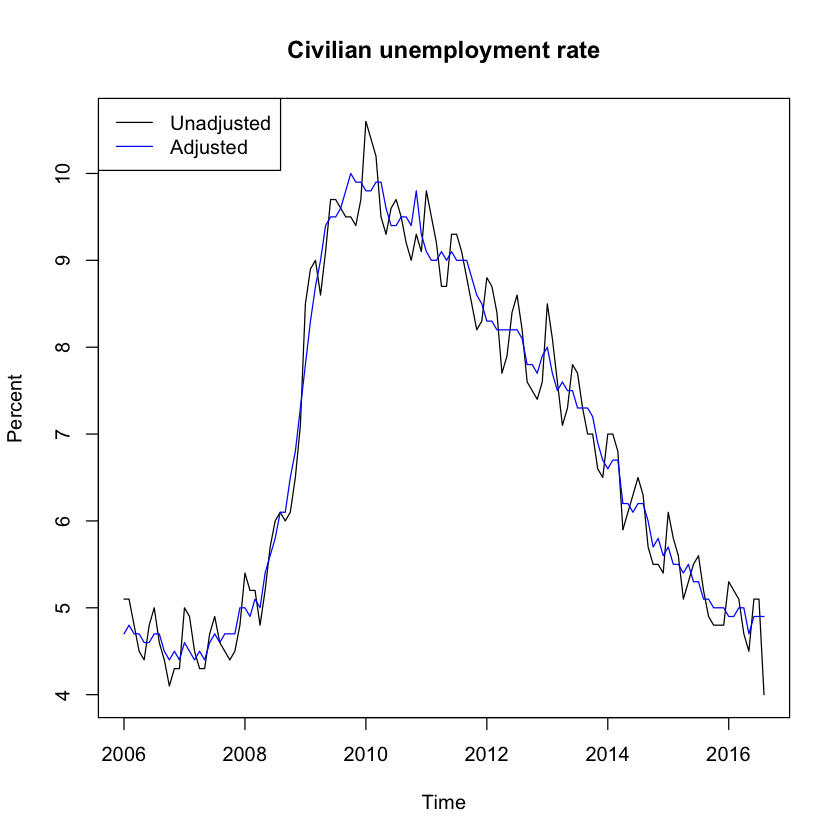

In [17]:
ur.nsa.short <- window(ur.nsa, start = 2006)
ur.short <- window(ur, start = 2006)

plot(ur.nsa.short, ylab = "Percent", main = "Civilian unemployment rate")
lines(ur.short, col = "blue")
legend("topleft", legend=c("Unadjusted","Adjusted"), col=c("black","blue"), lty = 1)


Now to compare the decomposition.  Note: you cannot pass a title to the plot from decompose command without writing a convoluted wrapper function which is too painful for me.



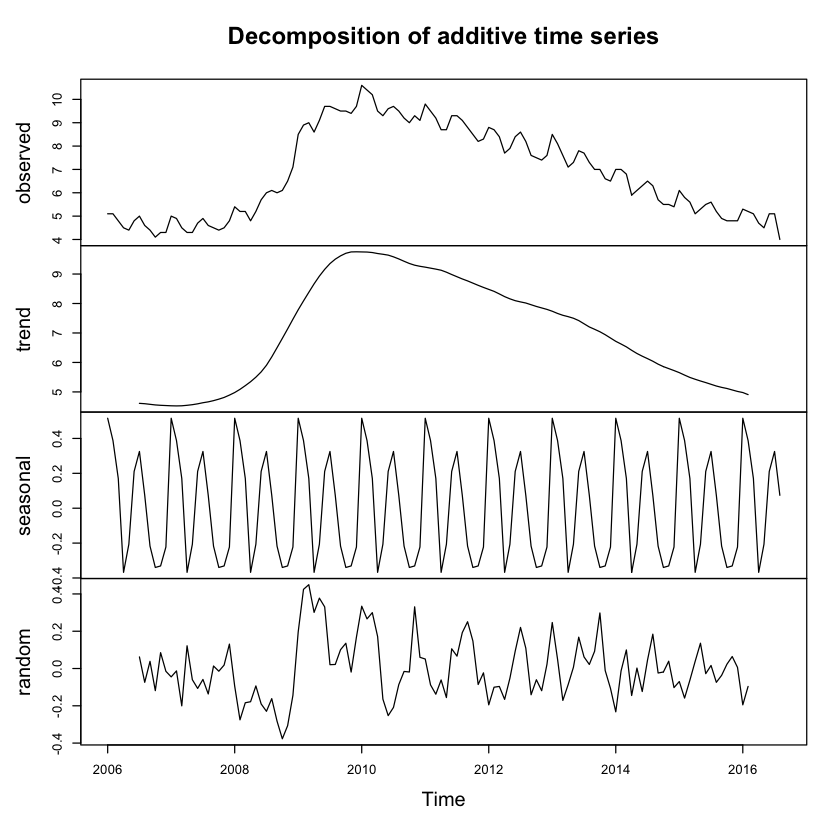

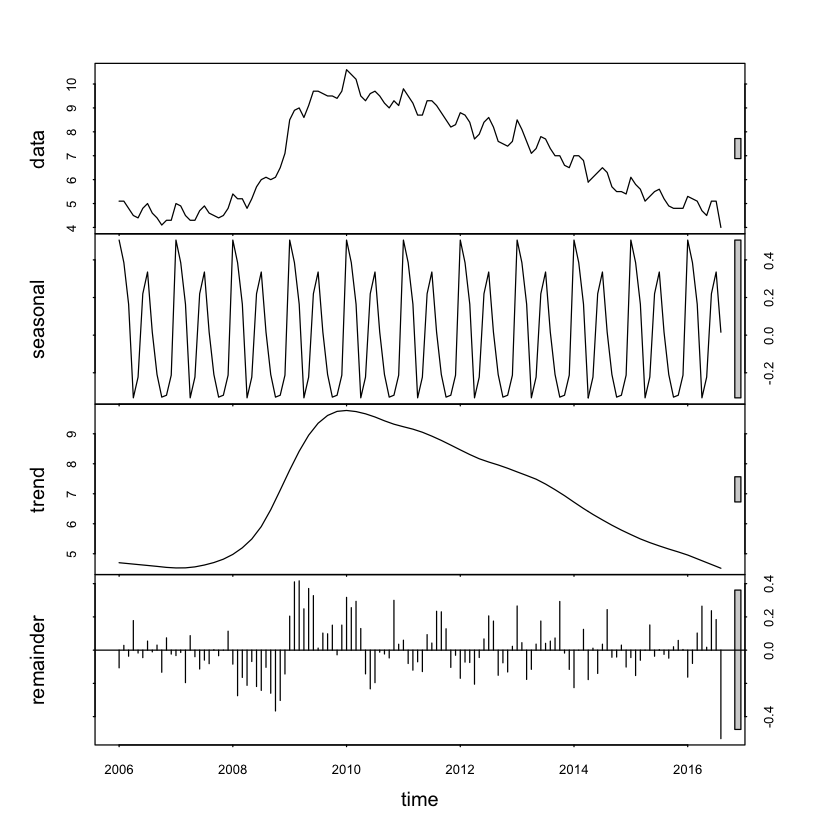

In [18]:
plot(decompose(ur.nsa.short))
plot(stl(ur.nsa.short, s.window = "periodic"))



Let's compare the seasonal calculations:




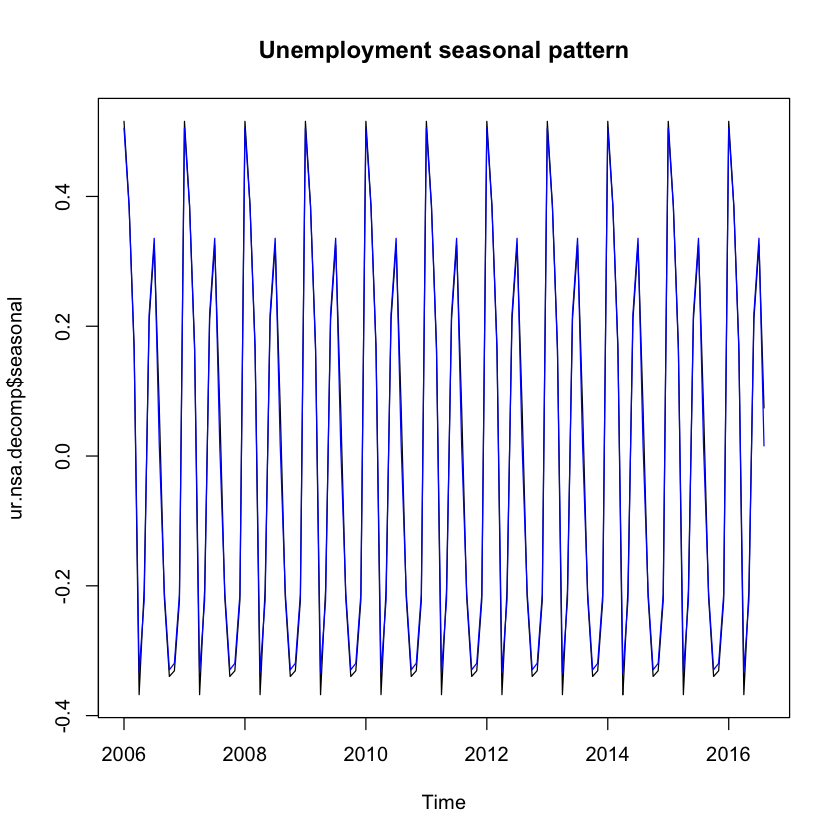

In [19]:
ur.nsa.decomp <- decompose(ur.nsa.short)
ur.nsa.stl <- stl(ur.nsa.short, s.window = "periodic")

plot(ur.nsa.decomp$seasonal, main = "Unemployment seasonal pattern")
lines(ur.nsa.stl$time.series[,1], col = "blue")


We can also use the seasadj command to take either of these seasonal factors and adjust the unadjusted rate.  How does that compare to the published rate?


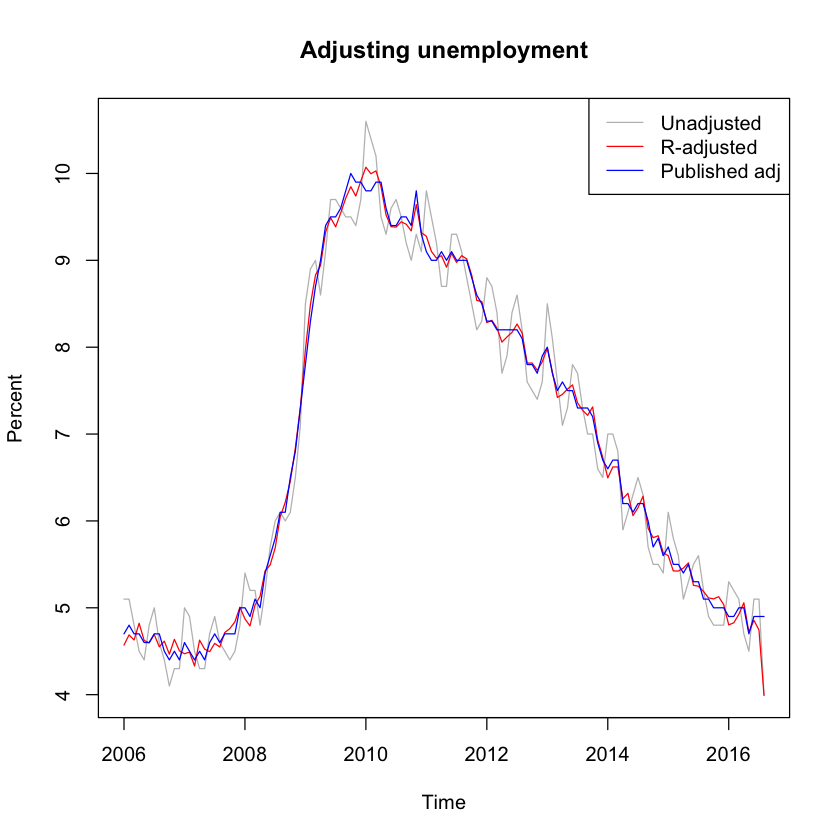

In [20]:
#decomposition first, then adjustment
fit <- stl(ur.nsa.short,s.window=15)
ur.nsa.short.sa <- seasadj(fit)

#let's see the results

plot(ur.nsa.short, col="gray", ylab = "Percent", main = "Adjusting unemployment")
fit <- stl(ur.nsa.short,s.window=15)
ur.nsa.short.sa <- seasadj(fit)
lines(ur.nsa.short.sa, col="red")
lines(ur.short, col = "blue")
legend("topright", legend=c("Unadjusted","R-adjusted","Published adj"), col=c("grey", "red", "blue"), lty = c(1,1,1))


Other ways to draw pictures of seasonal components:

Seasonal plots:

Data plotted against the individual “seasons” in
which the data were observed. For most of our examples,a
“season” is a month.)
Something like a time plot except that the data
from each season are overlapped.
Enables the underlying seasonal pattern to be
seen more clearly, and also allows any
substantial departures from the seasonal
pattern to be easily identified.




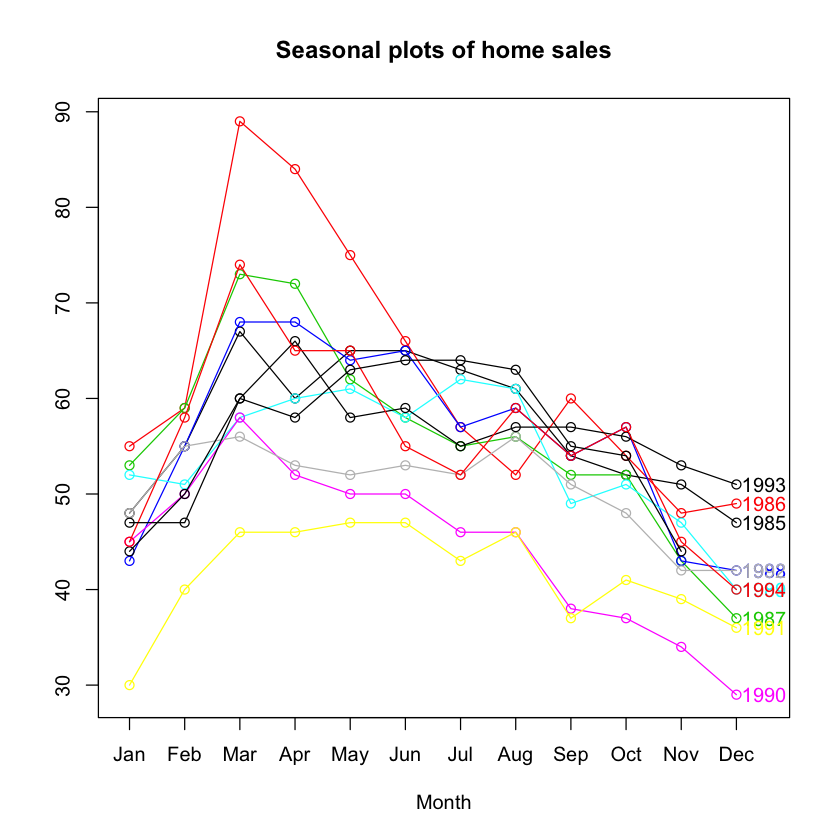

In [21]:
library(forecast)
seasonplot(window(hsales,start = 1985), year.labels = TRUE, col = 1:10, main = "Seasonal plots of home sales")


Seasonal sub series plots:
Data for each season collected together in time
plot as separate time series.
Enables the underlying seasonal pattern to be
seen clearly, and changes in seasonality over
time to be visualized.


Loading required package: expsmooth
Loading required package: lmtest


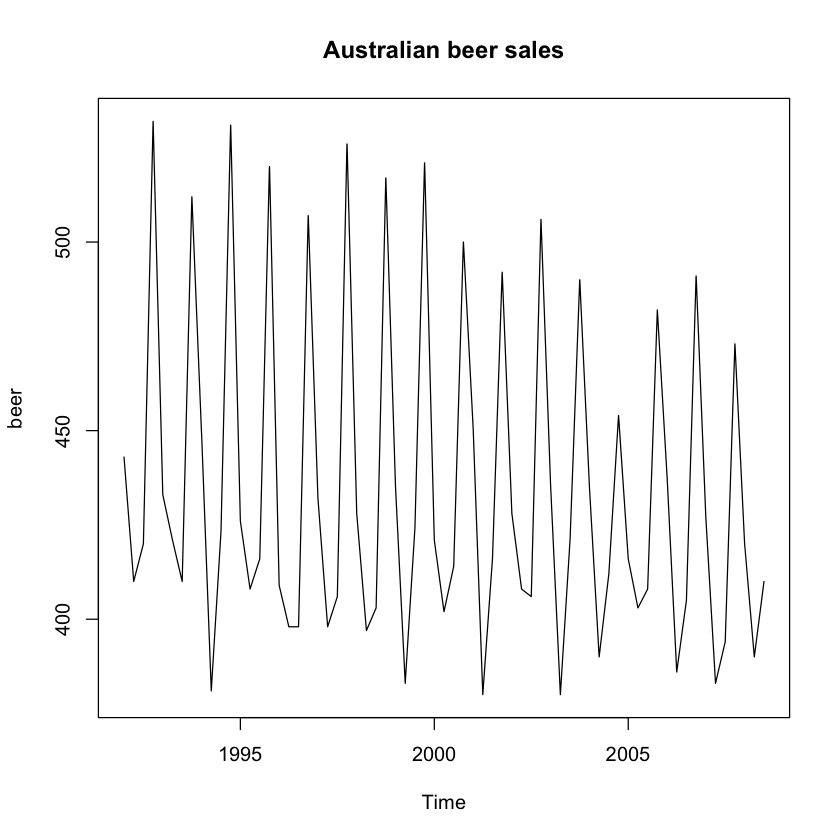

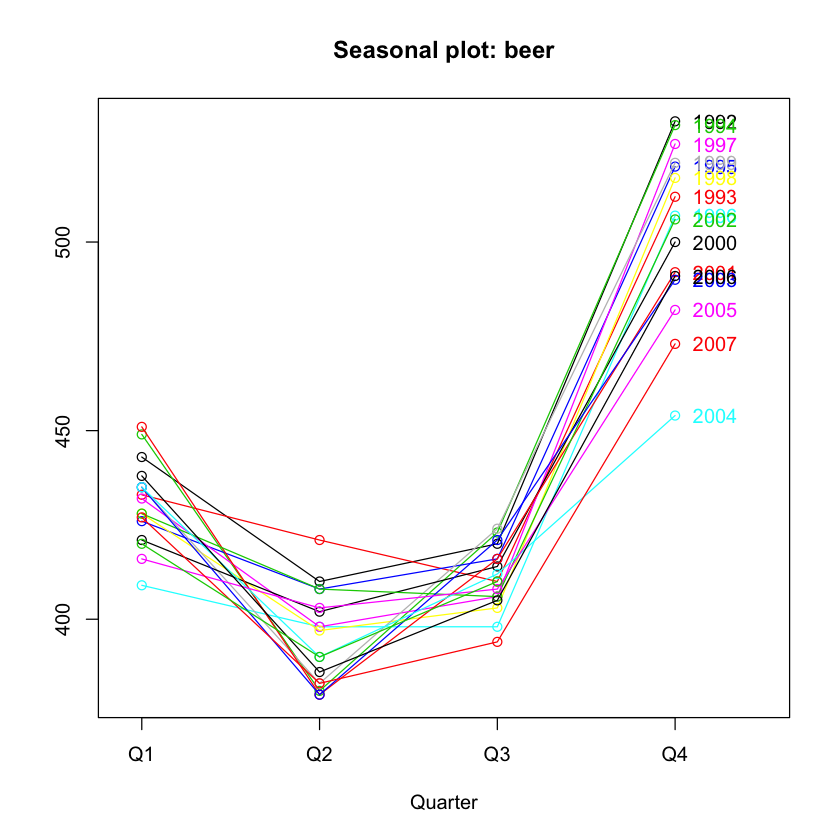

In [24]:
library(fpp)
beer <- window(ausbeer,start=1992)
plot(beer, main = "Australian beer sales")
seasonplot(beer,year.labels=TRUE, col = 1:14)
#monthplot(beer)
